## Neoclassical Growth Model

The neoclassical growth model is a canonical tool in macroeconomics. It's a generalization of the closely related Solow model and a starting point for analyzing diverse topics. This notebook quickly steps through a basic version of the neoclassical model and presents some graphs to give a flavor of the model's behavior.

For the sake of brevity, this notebook omits some detail. For more information, please consult a reference such as [Acemoglu](https://press.princeton.edu/titles/8764.html) or [Ljungqvist & Sargent](https://mitpress.mit.edu/books/recursive-macroeconomic-theory-1).


### Environment and Technology

Let's briefly consider a basic neoclassical model. This version is deterministic and  and features discrete time, population growth, labor augmenting technology, and inelastic labor supply. 

$ Y_t = F(K_t, A_t L_t) \\
  Y_t = C_t + K_{t+1} - (1 - \delta) K_t \\
  y_t = Y_t/A_t L_t \quad{} \& \quad{} k_t = K_t/A_t L_t \quad{} \& \quad{} c_t = C_t/A_t L_t \\
  y_t = f(k_t) = F(K_t/A_t L_t, 1) \\
  L_{t+1} = (1+n) L_{t} \\
  A_{t+1} = (1+g) A_{t} \\
  k_{t+1} = [y_t - c_t + (1 - \delta) k_t]/[(1+n)(1+g)] \\
  L_0 = 1 \quad{} \& \quad{} A_0 = 1 \quad{} \& \quad{} k_0 \space given
$

### Households

The household utility maximization problem is

$ max \sum_{t=0}^{\infty} \beta^{t} u(c_t) \\
   subject \space to \\
   (i) \space k_{t+1} = [(1-\delta+r_t)k_t+w_t-c_t]/[(1+n)(1+g)] \\
   (ii) \space \text{transversality condition}
$ 

and results in the familiar Euler equation

$  u'(c_t) / \beta u'(c_{t+1}) = (1-\delta+r_{t+1})/[(1+n)(1+g)] $


### Firms
The firm profit maximization problem is

$ max \space F(K_t,A_tL_t) - r_t K_t - w_t A_tL_t \\ $

and results in factor demand such that prices equal marginal productivities. Assuming that the production function exhibits constant returns to scale,

$ r_t = F_K(K_t,A_tL_t)=F_K(k_t,1)=f'(k_t) \\
  w_t = F_{AL}(K_t,A_tL_t)=F_{AL}(k_t,1)=f(k_t)-f'(k_t)k_t
$



### Equilibrium

In this model, an equilibrium is a path $\{k_t, c_t, y_t, r_t, w_t\}_{t=0}^{\infty}$ such that households and firms optimize given prices and applicable constraints, and markets clear.



### Steady State Equilibrium

A steady state equilibrium is one in which $k_t, y_t, \& c_t$ settle to a constant level. For example, in the case of $k$ (capital per "effective" worker) the steady state is such that $k_{t+1}=k_t=k^*$ for all $t$ past a certain point.

Substituting this into the Euler equation, we can find $k^*$ by

$  f'(k^*) = (1+n)(1+g)/\beta  - (1-\delta) $

which yields

$ y^* = f(k^*) \\
  c^* = f(k^*) + [(1-\delta)-(1+n)(1+g)]k^* 
  $

Under standard assumptions, this steady state has two special properties: uniqueness and stability. The Euler equation uniquely pins down $k^*$. And given any $k_0$, the capital stock $k$ converges to $k^*$.

### Value Function Iteration

Now that we've got a model and an equilibrium concept, let's tackle solving the model. What we're looking for in a solution is the equilibrium path of prices and quantities given $k_0$. The example below shows one case in which there exists a closed form analytic solution. However in general such solution aren't available. 

To find model solutions, let's take a look at the value function iteration method. Other methods do exist, notably including the policy function iteration and Euler equation methods. For this model, the value function is given by the Bellman equation

$ V(k_0) = max \space \{ u(c_0) + \beta V(k_1)  \} $

where $c_0$, $k_0$, and $k_1$ are consistent with the budget constraint. Related to the value function $V$ is the policy function. For any $k_t$, the policy function gives the value $k_{t+1}$ that solves the maximization problem on the right hand side of the Bellman equation.

This is an equivalent statement of the household maximization problem given above. Finding the value and policy functions solving the Bellman equation is equivalent to finding the choice $\{k_t\}_{t=1}^{\infty}$ that maximizes $\sum_{t=0}^{\infty} \beta^{t} u(c_t)$. As such, finding the value and policy functions yields the desired model solution.

We can approximate the value function by iterating on cadidate functions. The first step is to propose a reasonable first candidate, say 

$V_0(k) = 0 \space \text{for all } k $

then iterating as follows

$ V_{j+1}(k_0) = max \space \{ u(c_0) + \beta V_{j}(k_1)  \} $

The following code block implements this method for the model at hand. It should be noted that the domain of the value function is restricted to a discretization of the feasible range of $k$, as opposed to the continuum over which the true function is defined. The same goes for the policy function. Additionally, the range of the policy function is restricted to the same grid, in order to more conveniently use the policy function for solving the model over time.


### Model Implementation

So far we've discussed a model, an equilibrium concept, and a solution method. 

You can find an implementation of the model in the file [neoclassical.py](neoclassical.py) 

### Running the Model

Under certain assumptions, the model's value and policy function solutions have an analytic representation. In particular, if the utility function is logarithmic, the production function is Cobb-Douglas, and capital fully depreciates in each period, then we can find the solution by hand.

As a benchmark allowing us to test out the implementation, let's solve the model under these assumptions. We'll calculate approximated solution using the Python module, then graph it against the true solution.

Wall time: 6.5 s


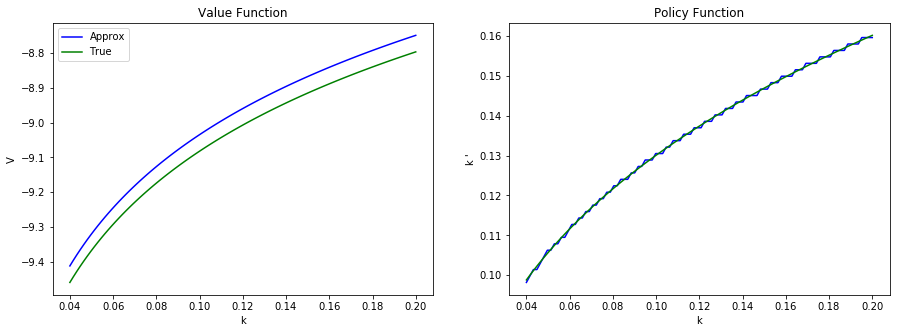

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neoclassical import NCG

# get numerical solutions via VFI
mod = NCG()
%time mod.vfi()


## get analytic solutions
# value function V(k) = A + B*ln(k) ... 
# solve using method of undetermined coefficients
A = 1/(1-mod.params['beta']) * (  mod.params['alpha']*mod.params['beta']/(1- mod.params['alpha']*mod.params['beta']) *np.log( mod.params['alpha']*mod.params['beta']/((1+mod.params['n'])*(1+mod.params['g']))) + np.log(1- mod.params['alpha']*mod.params['beta']) )
B =  mod.params['alpha']/(1- mod.params['alpha']*mod.params['beta'])
vf_true = [A+B*np.log(k) for k in mod.gridk]
    
# policy function
pf_true = [mod.params['alpha']*mod.params['beta']*k**mod.params['alpha']/((1+mod.params['n'])*(1+mod.params['g'])) 
           for k in mod.gridk]


## graph the approximations against the true functions
fig, ax = plt.subplots(1,2, figsize = (15,5))

# value  functions
ax[0].plot(mod.gridk, mod.vf, 'b')
ax[0].plot(mod.gridk, vf_true, 'g')
ax[0].set_title('Value Function')
ax[0].legend(['Approx', 'True'])
ax[0].set_xlabel('k')
ax[0].set_ylabel('V')
    
# policy functions
ax[1].plot(mod.gridk, mod.pf, 'b')
ax[1].plot(mod.gridk, pf_true, 'g')
ax[1].set_title('Policy Function')
ax[1].set_xlabel('k')
ax[1].set_ylabel("k '")

plt.show()


The default settings include 10 iterations in the VFI and 100 grid points in capital. At the cost of increased computational time, the quality of the approximation could be improved by changing these settings. Recall that the range of the policy function approximation is limited to the grid points in capital.

Now that we've got a solution, let's go ahead and simulate the model. For the initial level of capital, let's use the lowest value in the capital grid.

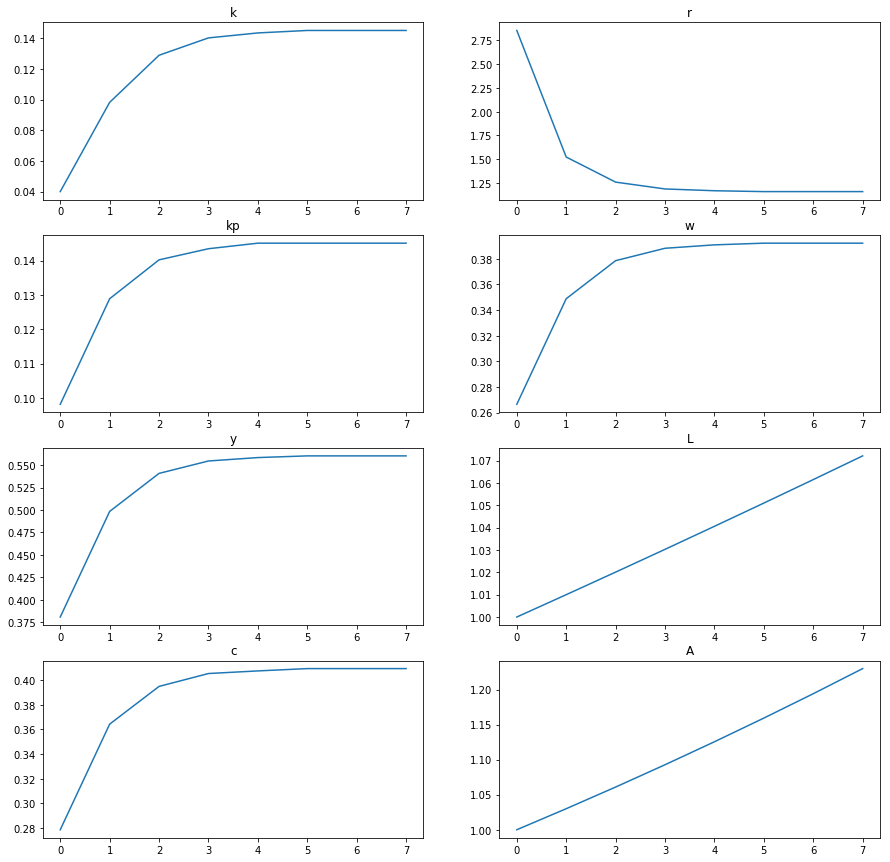

In [2]:
sim = mod.simulate(mod.gridk[0])

As shown, the per-effective-worker variables monotonically convergence to fixed levels. This shows a steady state equilibrium. 

Let's double check this solution against the theoretical steady state. Recall that capital is restricted to a discretized grid. In this exercise, the grid is evenly spaced. As shown below, although the grid does not include the theoretical $k^*$, the numerical solution finds the closest grid point.

In [3]:
print('theoretical k*: '+str(mod.k_steady()))
print('numerical k*:   '+str(sim['k'].iloc[-1]))
print('grid spacing:   '+str(mod.gridk[1]-mod.gridk[0]))

theoretical k*: 0.14559626586032864
numerical k*:   0.145050505051
grid spacing:   0.00161616161616


### Remarks

To recap, this notebook has given a quick look at a Python implementation of a basic neoclassical model. The model is deterministic and features discrete time, population growth, labor augmenting technology, and inelastic labor supply. Future avenues for this implementation include the addition of stochastic shocks, a labor-leisure choice for households, and endogenous growth in technology, among other things. That said, the present model provides a useful basic framework for systematic consideration of macroeconomic quantities.

Thanks for reading!